In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import pandas as pd
import h5py
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image, display_png
import csv
#import pydotplus as pdp

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

/usr/local/pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
dic_type={}
dic_type[1]="str"
dic_type[2]="str"
for i in range(3,11691):
    dic_type[2]="float64"

In [3]:
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)

In [17]:
print(merged_tsv3.iloc[1:80,:].values)

[[0.9523401088197916 0.0 1.7339167843419694 ... 0.0 0.0 0.0]
 [0.0 0.0 0.7452293606682078 ... 0.0 0.0 0.0]
 [0.0 0.0 2.9162661613050176 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 28.43705157723342 ... 0.0 0.0 0.0]
 [0.0 0.0 0.9253910505345556 ... 0.0 0.0 0.0]
 [0.8666048035450141 0.0 1.5797158401172011 ... 0.0 0.0 0.0]]


In [18]:
#分割して保存
np.save("TCGA-ACC.htseq_fpkm.npy",merged_tsv3.iloc[1:80,:].values)

In [19]:
merged_tsv3.iloc[1:80,:].shape
#np.save("train.npy",ft4)
#np.save("test.npy",df4)

(79, 56202)

In [2]:
ft4=np.load("train.npy")
df4=np.load("test.npy")

In [3]:
X_train, X_test, y_train, y_test =train_test_split(ft4,df4)
#print(ft3.shape,X_train.shape,y_train.shape)
#print(ft3.shape,X_train.shape,y_train.shape)

In [4]:
from keras.models import Sequential,optimizers
from keras.layers import Dense,Activation,Dropout
opt=optimizers.SGD(lr=0.0001)
#opt=optimizers.rmsprop(lr=0.001)
X_train,X_valid=np.split(X_train,[6000])
y_train,y_valid=np.split(y_train,[6000])
model1=Sequential()
model1.add(Dropout(0.05,input_shape=(56202,)))
model1.add(Dense(2048))
model1.add(Dense(2048,activation='relu'))
model1.add(Dense(2048,activation='relu'))
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(512,activation='relu'))
#model1.add(Dense(256,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(30))
model1.add(Activation("softmax"))
model1.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
fit=model1.fit(X_train,y_train,epochs=150,batch_size=512,verbose=2,validation_data=(X_valid,y_valid),callbacks=[])
score=model1.evaluate(X_test,y_test,batch_size=64)

Using TensorFlow backend.
/usr/local/pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Train on 6000 samples, validate on 2766 samples
Epoch 1/150
 - 6s - loss: 13.0482 - acc: 0.0732 - val_loss: 12.4376 - val_acc: 0.1396
Epoch 2/150
 - 3s - loss: 10.3610 - acc: 0.1795 - val_loss: 8.1041 - val_acc: 0.2343
Epoch 3/150
 - 3s - loss: 7.0852 - acc: 0.2760 - val_loss: 4.4038 - val_acc: 0.4469
Epoch 4/150
 - 3s - loss: 4.0726 - acc: 0.4298 - val_loss: 4.8190 - val_acc: 0.3012
Epoch 5/150
 - 3s - loss: 3.1555 - acc: 0.4857 - val_loss: 1.4671 - val_acc: 0.7043
Epoch 6/150
 - 3s - loss: 1.5520 - acc: 0.7067 - val_loss: 1.0856 - val_acc: 0.7979
Epoch 7/150
 - 3s - loss: 1.2712 - acc: 0.7567 - val_loss: 0.9098 - val_acc: 0.8351
Epoch 8/150
 - 3s - loss: 1.2328 - acc: 0.7573 - val_loss: 0.8223 - val_acc: 0.8478
Epoch 9/150
 - 3s - loss: 1.0656 - acc: 0.7917 - val_loss: 0.8001 - val_acc: 0.8435
Epoch 10/150
 - 3s - loss: 0.9703 - acc: 0.8013 - val_loss: 0.9123 - val_acc: 0.8207
Epoch 11/150
 - 3s - loss: 0.8182 - acc: 0.8172 - val_loss: 0.6160 - val_acc: 0.8492
Epoch 12/150
 - 3s - lo

Epoch 97/150
 - 3s - loss: 0.1430 - acc: 0.9593 - val_loss: 0.1888 - val_acc: 0.9552
Epoch 98/150
 - 3s - loss: 0.1470 - acc: 0.9590 - val_loss: 0.1885 - val_acc: 0.9588
Epoch 99/150
 - 3s - loss: 0.1424 - acc: 0.9575 - val_loss: 0.2067 - val_acc: 0.9476
Epoch 100/150
 - 3s - loss: 0.1274 - acc: 0.9662 - val_loss: 0.1978 - val_acc: 0.9552
Epoch 101/150
 - 3s - loss: 0.1498 - acc: 0.9605 - val_loss: 0.1971 - val_acc: 0.9541
Epoch 102/150
 - 3s - loss: 0.1363 - acc: 0.9618 - val_loss: 0.1956 - val_acc: 0.9530
Epoch 103/150
 - 3s - loss: 0.1275 - acc: 0.9647 - val_loss: 0.2046 - val_acc: 0.9516
Epoch 104/150
 - 3s - loss: 0.1555 - acc: 0.9548 - val_loss: 0.2584 - val_acc: 0.9364
Epoch 105/150
 - 3s - loss: 0.1681 - acc: 0.9482 - val_loss: 0.2098 - val_acc: 0.9508
Epoch 106/150
 - 3s - loss: 0.1398 - acc: 0.9575 - val_loss: 0.1939 - val_acc: 0.9497
Epoch 107/150
 - 3s - loss: 0.1327 - acc: 0.9630 - val_loss: 0.1820 - val_acc: 0.9599
Epoch 108/150
 - 3s - loss: 0.1270 - acc: 0.9638 - val_lo

In [7]:
pred_y=model1.predict(X_test)

In [8]:
np.sum(np.argmax(pred_y,axis=1)==np.argmax(y_test,axis=1))/pred_y.shape[0]

0.9585900068446269

In [9]:
print(X_test.shape)

(2922, 56202)


In [35]:
print(merged_tsv3.iloc[1:80,:].shape)

(79, 56202)


In [26]:
y_test[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
del 

In [ ]:
df2=pd.read_csv("answer.csv", delimiter="\t")
c = collections.Counter(df2["SMT"])

In [23]:
import collections
import matplotlib.pyplot as plt
#test_pati=np.load("TCGA-ACC.htseq_fpkm.npy")
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)
tsv=pd.read_csv("patient_data/TCGA-ESCA.htseq_fpkm.tsv", delimiter="\t")
#change FPKM to TPM
tsv.iloc[:,1:]=1000000*tsv.iloc[:,1:]/tsv.iloc[:,1:].sum()
#print(tsv)
merge_tsv=pd.merge(tsv, ft2, left_on='Ensembl_ID', right_on='Name', how='right')
print(merge_tsv.shape)
#欠損値補完
merge_tsv2=merge_tsv.transpose()
#del tsv
del merge_tsv
del ft2
merged_tsv3=merge_tsv2.fillna(merge_tsv2.iloc[tsv.shape[1]+2:,:].mean())

(56202, 11864)


In [15]:
print(merged_tsv3.iloc[1:tsv.shape[1],:].shape)

(79, 56202)


In [ ]:
print(predict_patient_class)

[29 22 22 29 22 29 29 22 29 22 29 29 29 29 22 29 29 22  8 22 22 22 29 22
 22 29 22 22 29 29 22 22 22 22 29 22 22 22 29 22 22 22 22 29 29 22 22 29
 29 29 29  8 22 22 29 29 22  8 22 29 29 29 29 29 29 29 22 29 29 29 29 22
 29 29 29 22 29 29 29 29 22 22 29 29 22 22 29 22 22 29 22 22 22 29  8 22
 29 22 22 22 22 22  8 22 22 22 22 29 22 22 29 29 22 22 29 22 22 22 29 29
 22 29 22 29 29 22 22 29 22 22 22 29 29 29 29 22 22 22 29  8 29 29 22 29
 22 22 29 29 29 22 22 29 29 22 29 22 22 22 22 22 29 22 29 29 22 22 22 22
 29 29 29 22 22]
Counter({22: 88, 29: 79, 8: 6})


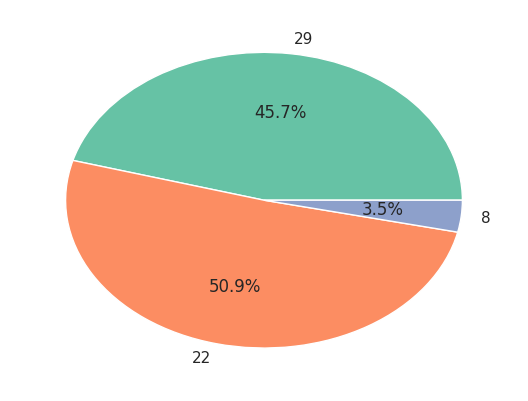

In [24]:
#predict
#del merge_tsv2
predict_patient_classes=model1.predict(merged_tsv3.iloc[1:tsv.shape[1],:].values)
del merged_tsv3
print(np.argmax(predict_patient_classes,axis=1))
pre_data=np.argmax(predict_patient_classes,axis=1).astype(np.int32)
np.savetxt("TCGA-ESCA.htseq_fpkm.csv",pre_data,delimiter=',')
c = collections.Counter(pre_data)
print(c)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')

c_d=dict(c)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(c_d.values(), labels=c_d.keys(), autopct="%1.1f%%")

plt.show()
##モデルの形と違っているので起こられている
#おそらくmergeのあとで変化、、ft2ではあってる）
#mergeチェック、これもkillされているのでもういちっどモデルからやり直す

In [13]:
import sys
print("{}{:>25}{:>10}{}".format('|','valuable name','|','memory','|'))
print("-------")
for var in dir():
    if not var.startswith("_") and sys.getsizeof(eval(var))>10000:
        print("{}{:>25}{:>10}{}".format('|',var,'|',sys.getsizeof(eval(var)),'|'))

|            valuable name         |memory
-------
|                      df4         |2805232
|  predict_patient_classes         |51712
|                      tsv         |212548501


In [12]:
del merge_tsv2 

In [10]:
del ft2

In [49]:
del merge

In [1]:
ls

GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/
GTEx_v7_Annotations_SampleAttributesDS.txt
TCGA-ACC.htseq_fpkm.npy
answer.csv
chap04_homework.ipynb
deeplearning.ipynb
file.ipynb
file_model.ipynb
patient/
patient data/
patient_model.ipynb
patient_model_apply.ipynb
test.npy
train.npy
